In [0]:
from pyspark.sql import SQLContext 
sqlContext = SQLContext(sc) 

from pyspark.sql import functions as F

/databricks/spark/python/pyspark/sql/context.py:82: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [0]:
spark_df = sqlContext.sql("Select * from bank") 
spark_df.count()

Out[2]: 11162

In [0]:
from pyspark.sql.types import IntegerType
from pyspark.sql.functions import udf 
from pyspark.sql.functions import *

depositlabel = udf(lambda x: 1 if x == 'yes' else 0, IntegerType()) 
spark_df = spark_df.withColumn("deposit", depositlabel(spark_df["deposit"]))
spark_df.groupBy('deposit').count().show()

+-------+-----+
|deposit|count|
+-------+-----+
|      1| 5289|
|      0| 5873|
+-------+-----+



In [0]:
pandas_df = spark_df.toPandas()
pandas_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,0
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,0
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,0
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,0


In [0]:
spark_df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- deposit: integer (nullable = true)



In [0]:
from pyspark.sql import functions as F
from pyspark.sql.functions import col

null_count_list = []
total = spark_df.count()
for i in spark_df.columns:
  null_count = (spark_df.select(i).where(col(i).isNull()).count())
  null_count_list.append([i,null_count])
null_count_list


Out[9]: [['age', 0],
 ['job', 0],
 ['marital', 0],
 ['education', 0],
 ['default', 0],
 ['balance', 0],
 ['housing', 0],
 ['loan', 0],
 ['contact', 0],
 ['day', 0],
 ['month', 0],
 ['duration', 0],
 ['campaign', 0],
 ['pdays', 0],
 ['previous', 0],
 ['poutcome', 0],
 ['deposit', 0]]

Out[12]: Text(0.5, 1.0, 'deposit Vs duration')

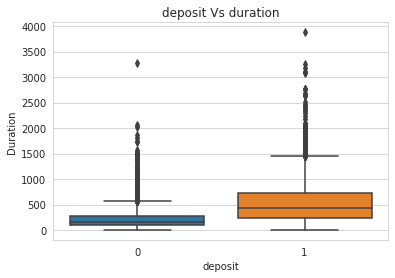

In [0]:
fig, ax = plt.subplots()
sns.set_style("whitegrid") 

pandas_df = spark_df.select('deposit', 'Duration').toPandas()

ax = sns.boxplot(x='deposit', y='Duration', data = pandas_df) 

ax.set_title('deposit Vs duration')

In [0]:
target = 'deposit'

In [0]:
dtypes = spark_df.dtypes
cat_input = []
for i in range(0, len(spark_df.columns))
  if dtypes[i][1] == 'string': 
    cat_input.append(dtypes[i][0]) 
cat_input = list(set(cat_input)-set(target)) 
cat_input

Out[14]: ['job',
 'loan',
 'education',
 'housing',
 'marital',
 'default',
 'month',
 'poutcome',
 'contact']

In [0]:
num_input = list(set(spark_df.columns) - set([target]) - set(cat_input))
num_input

Out[15]: ['campaign', 'age', 'pdays', 'duration', 'previous', 'day', 'balance']

In [0]:
from pyspark.sql.types import DoubleType
from pyspark import keyword_only  
from pyspark.ml import Transformer
from pyspark.ml.param.shared import HasInputCol, HasOutputCol, Param
from pyspark.sql.functions import udf
from pyspark.sql.types import ArrayType, StringType
from pyspark.sql.functions import col



class NumericImputer(Transformer, HasInputCol, HasOutputCol):

    def __init__(self, inputCol=None, outputCol=None): 
        super(NumericImputer, self).__init__()  
        self.setParams(inputCol = inputCol , outputCol = outputCol)  

        
    def setParams(self, inputCol=None, outputCol=None):  
      return self._set(inputCol = inputCol, outputCol = outputCol)  
        

    def _transform(self, dataset):  

      out_col = self.getOutputCol()  
      in_col = self.getInputCol()  
      
      
      
      from pyspark.sql.functions import when  
      from pyspark.sql.types import DoubleType
      median_v = dataset.approxQuantile(in_col, [0.5], 0)[0] 
      return dataset.withColumn(out_col, when(col(in_col).isNull(), median_v).otherwise(col(in_col)).cast(DoubleType()))

In [0]:
numericimputers = [] 
for column in num_input:
  numericimputers.append(NumericImputer(inputCol = column , outputCol = column))
numericimputers

Out[17]: [NumericImputer_dc2cef506195,
 NumericImputer_0851223b8954,
 NumericImputer_639bbde8d3a7,
 NumericImputer_b00b74577e18,
 NumericImputer_8b50dddf401a,
 NumericImputer_defdbef3711f,
 NumericImputer_caccdaf62f6b]

In [0]:
from pyspark import keyword_only  
from pyspark.ml import Transformer
from pyspark.ml.param.shared import HasInputCol, HasOutputCol, Param
from pyspark.sql.functions import udf
from pyspark.sql.types import ArrayType, StringType
from pyspark.sql.functions import col

class CategoricalImputer(Transformer, HasInputCol, HasOutputCol): 

    def __init__(self, inputCol=None, outputCol=None): 
        super(CategoricalImputer, self).__init__()  
        self.setParams(inputCol = inputCol , outputCol = outputCol)  

        
    def setParams(self, inputCol=None, outputCol=None):  
      return self._set(inputCol = inputCol, outputCol = outputCol)  
        

    def _transform(self, dataset):  

      out_col = self.getOutputCol()  
      in_col = self.getInputCol()  
      
      temp = dataset.groupby(in_col).count() 
      temp = temp.filter(temp[in_col]!= 'null') 
      sorted_df = temp.sort(temp['count'].desc()).toPandas() 
      mode_v = sorted_df.loc[0][in_col] 
      
      return dataset.withColumn(out_col, when(col(in_col).isNull(), mode_v).otherwise(col(in_col)))

In [0]:
cat_imputers = [CategoricalImputer(inputCol = column, outputCol = column) for column in cat_input]
cat_imputers

Out[19]: [CategoricalImputer_57c19c85f2c1,
 CategoricalImputer_1a03566adff8,
 CategoricalImputer_9ade6a39373a,
 CategoricalImputer_629e7e043549,
 CategoricalImputer_676b93d0d453,
 CategoricalImputer_8e5071c337b0,
 CategoricalImputer_50727405c26a,
 CategoricalImputer_d775fa21beca,
 CategoricalImputer_c73c9c9b9066]

In [0]:
from pyspark import keyword_only  
from pyspark.ml import Transformer
from pyspark.ml.param.shared import HasInputCol, HasOutputCol, Param
from pyspark.sql.functions import udf
from pyspark.sql.types import ArrayType, StringType


class Scaler(Transformer, HasInputCol, HasOutputCol):

    def __init__(self, inputCol=None, outputCol=None): 
        super(Scaler, self).__init__() 
        self.setParams(inputCol = inputCol , outputCol = outputCol) 

        
        
    def setParams(self, inputCol=None, outputCol=None): 
      return self._set(inputCol = inputCol, outputCol = outputCol) 
        

    def _transform(self, dataset):
      from pyspark.sql.functions import stddev, mean, col
      out_col = self.getOutputCol() 
      in_col = dataset[self.getInputCol()] 
      xmin, xmax = dataset.select(min(in_col), max(in_col)).first() 
      return dataset.withColumn(out_col, (in_col - xmin)/(xmax-xmin))

In [0]:
scalers = [Scaler(inputCol = column, outputCol = column+"_scaled") for column in num_input]
scalers

Out[21]: [Scaler_bd409c836407,
 Scaler_91f9ad10e093,
 Scaler_a2af4145951f,
 Scaler_6fe98dd04c71,
 Scaler_af72b90bddb7,
 Scaler_cf7fbe68b9de,
 Scaler_e59c4f027647]

In [0]:
from pyspark import keyword_only  
from pyspark.ml import Transformer
from pyspark.ml.param.shared import HasInputCol, HasOutputCol, Param
from pyspark.sql.functions import udf
from pyspark.sql.types import ArrayType, StringType
from pyspark.ml.feature import OneHotEncoder
from pyspark.ml.feature import StringIndexer

indexers = [StringIndexer(inputCol = column, outputCol = column+"_index") for column in cat_input] 
encoders = [OneHotEncoder(inputCol = column+"_index", outputCol = column+"_dummy") for column in cat_input] 

In [0]:
input_cols = [] 
for i in cat_input:
  input_cols.append(i+"_dummy") 
for i in num_input: 
  input_cols.append(i+"_scaled") 
input_cols

Out[23]: ['job_dummy',
 'loan_dummy',
 'education_dummy',
 'housing_dummy',
 'marital_dummy',
 'default_dummy',
 'month_dummy',
 'poutcome_dummy',
 'contact_dummy',
 'campaign_scaled',
 'age_scaled',
 'pdays_scaled',
 'duration_scaled',
 'previous_scaled',
 'day_scaled',
 'balance_scaled']

In [0]:
from pyspark.ml.feature import StringIndexer
import functools 
import operator
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression

stages = []
assembler = VectorAssembler(inputCols= input_cols, outputCol="features") 
stages = functools.reduce(operator.concat, [numericimputers, cat_imputers, indexers, encoders, scalers]) 
stages.append(assembler)
stages

Out[24]: [NumericImputer_dc2cef506195,
 NumericImputer_0851223b8954,
 NumericImputer_639bbde8d3a7,
 NumericImputer_b00b74577e18,
 NumericImputer_8b50dddf401a,
 NumericImputer_defdbef3711f,
 NumericImputer_caccdaf62f6b,
 CategoricalImputer_57c19c85f2c1,
 CategoricalImputer_1a03566adff8,
 CategoricalImputer_9ade6a39373a,
 CategoricalImputer_629e7e043549,
 CategoricalImputer_676b93d0d453,
 CategoricalImputer_8e5071c337b0,
 CategoricalImputer_50727405c26a,
 CategoricalImputer_d775fa21beca,
 CategoricalImputer_c73c9c9b9066,
 StringIndexer_34060a6888c6,
 StringIndexer_8f2d5bea4810,
 StringIndexer_7df288b8a70c,
 StringIndexer_a90aed546656,
 StringIndexer_f0dd1ef84b42,
 StringIndexer_7fbcffbf79d6,
 StringIndexer_f32463ff50a0,
 StringIndexer_e7f0797183dc,
 StringIndexer_8bf6c1238566,
 OneHotEncoder_08b326edf5ce,
 OneHotEncoder_bad08c65b51a,
 OneHotEncoder_a0372bf07fb3,
 OneHotEncoder_6364534db9e8,
 OneHotEncoder_1194af15fe92,
 OneHotEncoder_972a5a70cbba,
 OneHotEncoder_5e17d296721e,
 OneHotEnco

In [0]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages=stages)
spark_df = pipeline.fit(spark_df).transform(spark_df)

In [0]:
train, test = spark_df.randomSplit([0.7, 0.3], seed = 2018) 
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 7855
Test Dataset Count: 3307


In [0]:
  lr = LogisticRegression(labelCol=target, featuresCol="features", maxIter=10) 
  logRegModel = lr.fit(train) 

In [0]:
logRegModel.transform(train).select('probability', 'prediction').toPandas() 

/databricks/spark/python/pyspark/sql/pandas/conversion.py:92: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unable to convert the field probability. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Direct cause: Unsupported type in conversion to Arrow: VectorUDT
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warnings.warn(msg)


,probability,prediction
0,"[0.07993781884566759, 0.9200621811543324]",1.0
1,"[0.5724074732232288, 0.4275925267767712]",0.0
2,"[0.5761977354428086, 0.4238022645571914]",0.0
3,"[0.13823149543060753, 0.8617685045693925]",1.0
4,"[0.06321849997876111, 0.9367815000212389]",1.0
...,...,...
7850,"[0.5398137966332309, 0.4601862033667691]",0.0
7851,"[0.11604213857943277, 0.8839578614205672]",1.0
7852,"[0.2115299907410642, 0.7884700092589358]",1.0
7853,"[0.004019596297304782, 0.9959804037026952]",1.0


In [0]:
print("Coefficients: \n" + str(logRegModel.coefficientMatrix)) 
print("Intercept: " + str(logRegModel.interceptVector)) 

Coefficients: 
DenseMatrix([[-1.12153125e-01, -1.42829352e-01,  1.12166573e-02,
               1.57111235e-01, -1.87177906e-01,  4.92629930e-01,
              -2.43892480e-01,  8.74193442e-01,  1.35178718e-01,
              -8.14412145e-02, -9.89983752e-02,  4.36559567e-01,
              -5.70102214e-02,  2.37381753e-01, -3.04118341e-01,
               6.88630835e-01, -1.46027437e-01,  1.64747624e-01,
               8.55063600e-02, -5.25482559e-01, -6.85677359e-01,
              -7.95237982e-01,  4.37748258e-01, -6.86409242e-01,
               2.12602336e-01, -9.99321589e-03,  1.34870927e+00,
              -9.62177840e-01,  1.14121604e+00,  2.30208276e+00,
              -3.08692215e-01,  6.58591636e-02,  2.24418862e+00,
               5.89735334e-02, -1.58079143e+00, -5.47851757e+00,
               4.28173879e-02, -5.31750324e-01,  2.15893114e+01,
               4.18498388e-01, -2.92795071e-03,  2.73640116e+00]])
Intercept: [-2.456009040392682]


In [0]:
summary = logRegModel.summary 
accuracy = summary.accuracy
falsePositiveRate = summary.weightedFalsePositiveRate 
truePositiveRate = summary.weightedTruePositiveRate 
fMeasure = summary.weightedFMeasure() 
precision = summary.weightedPrecision 
recall = summary.weightedRecall 
print("Accuracy: %s\nFPR: %s\nTPR: %s\nF-measure: %s\nPrecision: %s\nRecall: %s"
      % (accuracy, falsePositiveRate, truePositiveRate, fMeasure, precision, recall))

Accuracy: 0.830426479949077
FPR: 0.1728226422658328
TPR: 0.830426479949077
F-measure: 0.8301484026791903
Precision: 0.8306720254386019
Recall: 0.830426479949077


/databricks/spark/python/pyspark/sql/context.py:134: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


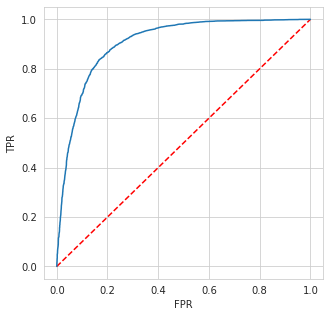

In [0]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(5,5))
plt.plot([0, 1], [0, 1], 'r--') 
plt.plot(summary.roc.select('FPR').collect(),
         summary.roc.select('TPR').collect())
plt.xlabel('FPR') 
plt.ylabel('TPR')  
display(plt.show())

In [0]:
predictions = logRegModel.transform(test) 
predictions = predictions.withColumnRenamed("deposit", "label") 
predictions.select('label', 'prediction', 'probability').show(10) 

+-----+----------+--------------------+
|label|prediction|         probability|
+-----+----------+--------------------+
|    1|       1.0|[0.43545439199292...|
|    1|       0.0|[0.70275320465736...|
|    0|       1.0|[0.17046922919640...|
|    1|       1.0|[0.48931117828725...|
|    1|       1.0|[0.17410305179548...|
|    1|       1.0|[0.07933204706680...|
|    1|       1.0|[0.27288938393856...|
|    1|       1.0|[0.44668331698173...|
|    1|       1.0|[0.03403303816422...|
|    1|       1.0|[0.20299397465216...|
+-----+----------+--------------------+
only showing top 10 rows



In [0]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator()
print('Test Area Under ROC', evaluator.evaluate(predictions)) 

Test Area Under ROC 0.9014417152714989
